In [1]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats

import functions_optimal as fun

area=4.0;linethicknes=1.0;

font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42
area=4.0;linethicknes=1.0;


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Fix parameters


In [2]:
idx_species=1;

g_E=8
g_I=3
'''beta=

log10_CVopto=np.log10(0.1)
log10_J=np.log10(0.0001)
'''
nRep=10;


# Build function param-> network response

In [3]:
results=np.loadtxt('results_sim.txt');
sim_param_all=results[:,0:15]
moments_of_r_sim_all=results[:,15:20]

sim_g_E=(sim_param_all[:,2])
sim_g_I=(sim_param_all[:,3])
sim_beta=(sim_param_all[:,4])
sim_CV_K=(sim_param_all[:,7])
sim_sigma_Lambda_over_Lambda=(sim_param_all[:,10])
sim_J=(sim_param_all[:,11])
sim_r_X=(sim_param_all[:,12])
sim_ell=(sim_param_all[:,13])

print(np.shape(results))

Predictor_sim,Predictor_data=fun.build_function(results)

(121278, 28)
Test R^2 Score : 0.943
Training R^2 Score : 0.959


# Create dataset

In [7]:
data_mice=np.loadtxt('Mice_with_trials.txt');
data_monkeys=np.loadtxt('Monkeys_with_trials.txt');
data_both_species=[data_mice,data_monkeys]

dataset,Con,nCon=fun.build_dataset(data_both_species[idx_species])


In [8]:
np.shape(dataset)

(6, 6, 2)

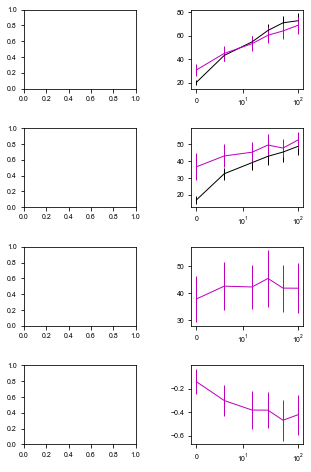

In [9]:

rows=4
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()




for idx_moment in range(6):
    if idx_moment<2:
        idx_row=0
        ccc=['k',colors[idx_species]][idx_moment]

    if (idx_moment>=2)&(idx_moment<4):
        idx_row=1
        ccc=['k',colors[idx_species]][idx_moment-2]

    if (idx_moment==4):
        idx_row=2
        ccc=colors[idx_species]

    if (idx_moment==5):
        idx_row=3
        ccc=colors[idx_species]

    axs[2*idx_row+idx_species].errorbar(Con,dataset[idx_moment,:,0],dataset[idx_moment,:,1],
                                             color=ccc,)

    axs[2*idx_row+idx_species].set_xscale('symlog', linthreshx=12)




# Fit on dataset

In [10]:
sol,cost=fun.fit_model_to_data_fixed_gs(g_E,g_I,dataset,Predictor_data,nCon,nRep)

rep= 0  param init= [-0.57 -3.42 -0.58 -4.61]
[-0.2  -1.89  1.   -2.75] 7.159751830909121
rep= 1  param init= [-0.58 -3.42 -0.4  -4.59]
[-0.58 -3.42 -0.4  -4.59] 332.71255575446474
rep= 2  param init= [-0.79 -3.42  0.39 -4.34]
[-0.77 -3.52  0.23 -3.86] 17.96094595345312
rep= 3  param init= [-0.71 -3.42 -0.02 -3.54]
[-0.47 -3.21  0.08 -3.66] 16.54934785476058
rep= 4  param init= [-0.93 -3.42  0.5  -4.93]
[-0.73 -1.89  0.99 -3.39] 9.05084315280395
rep= 5  param init= [-0.35 -3.42  0.69 -4.92]
[ 0.26 -3.52  1.   -4.64] 107.00415461238997
rep= 6  param init= [-0.81 -3.42  0.21 -3.27]
[-0.33 -1.8   1.   -2.4 ] 6.970560590227164
rep= 7  param init= [-0.98 -3.42  0.3  -4.27]
[-0.78 -3.49  0.13 -3.87] 17.79412659370058
rep= 8  param init= [-0.78 -3.42 -0.93 -3.48]
[-0.96 -3.35 -0.48 -3.24] 44.825819549300604
rep= 9  param init= [-0.98 -3.42  0.3  -4.74]
[-0.66 -2.19  0.86 -3.73] 11.556633190248931


In [11]:
idx_best=np.argmin(cost)
best_param=sol[idx_best,:]
best_cost=cost[idx_best]
best_param=np.concatenate(([g_E,g_I],best_param))
best_inputs=fun.fit_inputs_to_data_given_param(dataset,Predictor_data,best_param,nCon)

print(best_param,best_inputs,best_cost)

[ 8.    3.   -0.33 -1.8   1.   -2.4 ] [1.01 1.45 1.56 1.63 1.66 1.69 1.75] 6.970560590227164


Monkeys 6.970560590227164
array([ 8.  ,  3.  , -0.33, -1.8 ,  1.  , -2.4 ])
array([1.01, 1.45, 1.56, 1.63, 1.66, 1.69, 1.75])


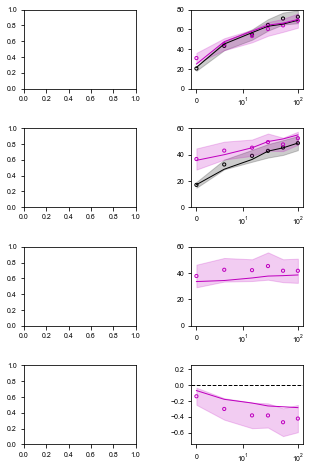

In [12]:

rows=4
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()




Predictions=Predictor_data(best_inputs,best_param,nCon)
print(['Mice','Monkeys'][idx_species],best_cost)
print(repr(best_param))
print(repr(best_inputs))        
for idx_moment in range(6):
    if idx_moment<2:
        idx_row=0
        ccc=['k',colors[idx_species]][idx_moment]
        ymin=0
        ymax=[25,80][idx_species]

    if (idx_moment>=2)&(idx_moment<4):
        idx_row=1
        ccc=['k',colors[idx_species]][idx_moment-2]
        ymin=0
        ymax=[20,60][idx_species]

    if (idx_moment==4):
        idx_row=2
        ccc=colors[idx_species]
        ymin=0
        ymax=[20,60][idx_species]

    if (idx_moment==5):
        idx_row=3
        ccc=colors[idx_species]
        ymin=-0.75
        ymax=0.25

    m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
    axs[2*idx_row+idx_species].scatter(Con,m,
                                       facecolors='none', s=10,edgecolors=ccc,marker='o'
                                       )
    axs[2*idx_row+idx_species].fill_between(Con,m-sem,m+sem,
                                             color=ccc,alpha=0.2)

    axs[2*idx_row+idx_species].plot(Con,Predictions[idx_moment,:],
                                    color=ccc,alpha=1.)

    axs[2*idx_row+idx_species].set_xscale('symlog', linthreshx=12)
    axs[2*idx_row+idx_species].set_ylim([ymin,ymax])
axs[2*idx_row+idx_species].axhline(y=0,ls='--',c='k')

In [13]:
results=np.zeros((1,len(best_param)
                  +len(best_inputs)
                 +1))

results[0,0:len(best_param)]=best_param[:]
results[0,len(best_param):(len(best_param)+len(best_inputs))]=best_inputs[:]
results[0,(len(best_param)+len(best_inputs))]=best_cost


In [14]:
results

array([[ 8.  ,  3.  , -0.33, -1.8 ,  1.  , -2.4 ,  1.01,  1.45,  1.56,
         1.63,  1.66,  1.69,  1.75,  6.97]])